In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Hypothesis testing: Chi-Square Test



Source: "Practical Statistics for Data Scientists" (124 - 126).

In this notebook we'll show you how to calculate a chi-square test. We'll do this twice.
* First, we'll go through the approach manually so you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Second, we'll go through the shorter coding way, where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

# I. The manual approach

Imagine we made three different versions of a website and each version received 1000 visits last week. On each website, we placed a button with a slightly different appearance, but all leading to the same super cool thing. Now we want to find out if one of the versions is significantly better than the others.

In order to determine if one of the website versions is significantly better than the others, we can use the chi-squared test. This test helps us understand whether any observed differences in the number of button clicks are statistically significant or not.

The chi-squared test compares the observed frequencies, which are the actual number of clicks for each website version, with the expected frequencies, which are the number of clicks we would expect if all versions were equally effective. By analyzing the difference between the observed and expected frequencies, the chi-squared test calculates a statistical value called the chi-squared statistic (similar to the t-score, a.k.a the t-statistic).

If the chi-squared statistic is large enough and exceeds a certain critical value, we can conclude that the differences in button clicks are unlikely to occur by chance alone.


## 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

**Null Hypothesis ($H_0$):** The click rate on each website (A, B, and C) is equal.

**Alternative Hypothesis ($H_A$):** At least one of the websites has a significantly different click rate compared to the others, either better or worse.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

Commonly used levels are 0.1, 0.05 and 0.01.

In our case, as we don't expect the color of a button to have a profound impact on the course of history, a comfortable alpha level of 0.1 would be suitable.

In [2]:
alpha = 0.1

## 3.&nbsp; Collect Data that is random and independent

We will assume that this experiment was carefully designed, ensuring that the data collected is random and independent, which is crucial for reliable statistical analysis.

To recap, we created three distinct versions of a website, and each version received 1000 visits last week. On each website, we implemented a button with a slightly different appearance that directed users to the same super cool thing. Below are the results, showing the number of people who clicked on the button, and didn't click on the button, for each website version.

In [3]:
Click = [14, 8, 12]
No_click = [986, 992, 988]

observed_results = pd.DataFrame([Click, No_click],
                                  columns = ["A", "B", "C"],
                                  index = ["Click", "No-click"])
observed_results

,A,B,C
Click,14,8,12
No-click,986,992,988


## 4.&nbsp; Calculate the test result
The Chi-squared statistic is calculated by:

\begin{align}
\chi^2_c = \sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}
    \end{align}

---

n = total number of columns

r = total number of rows

c = degrees of freedom

$O_{ij}$ = observed value in the ith column and jth row

$E_{ij}$ = expected value in the ith column and jth row

---

While this formula may seem daunting at first glance, it's not as complex as it appears. To calculate the Chi-Squared statistic, you perform the following steps for each cell in the table: subtract the expected value from the observed value, square the result, and then divide this value by the expected value. This process is repeated for each cell in the table, and the individual results are then summed up to yield the Chi-Squared statistic.

### Calculating degrees of freedom
The formula for calculating the degrees of freedom is:
\begin{align}
c = (n - 1) \times (r - 1)
    \end{align}

n = total number of columns

In [4]:
n = observed_results.shape[1]
n

3

r = total number of rows

In [5]:
r = observed_results.shape[0]
r

2

c = degrees of freedom

In [6]:
c = (n - 1) * (r - 1)
c

2

Let's plot a few chi squared distributions with different degrees of freedom to see how they differ from t-distributions.

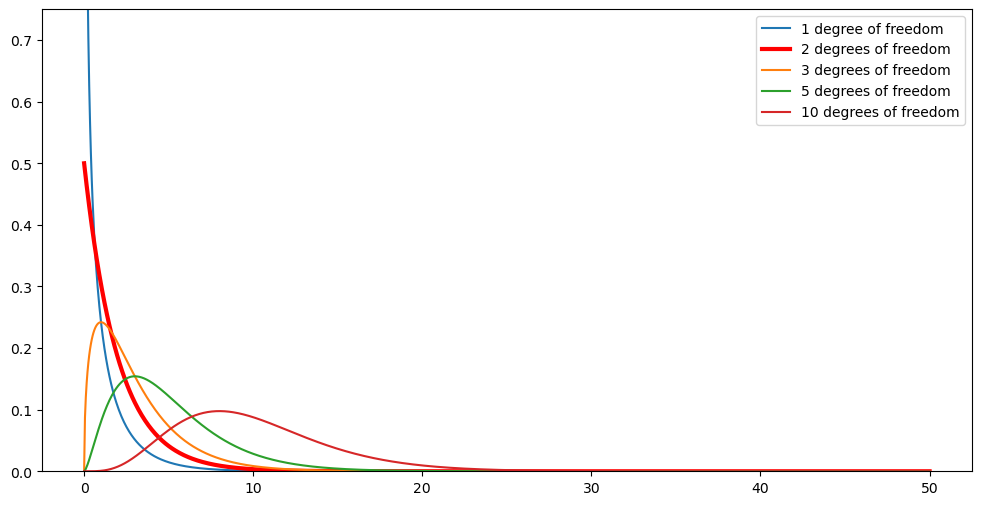

In [7]:
#@title Chi-squared distributions with different degrees of freedom

import numpy as np
from scipy.stats import chi2

plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Show values on the y-axis between 0 and 0.75.
plt.ylim(0, 0.75)
# Plot chi-squared distributions with different degrees of freedom.
plt.plot(xt, chi2.pdf(xt,1), label="1 degree of freedom")
plt.plot(xt, chi2.pdf(xt,2), color="red", lw=3, label="2 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,3), label="3 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,5), label="5 degrees of freedom")
plt.plot(xt, chi2.pdf(xt,10), label="10 degrees of freedom")
plt.legend()
plt.show()

### Storing each of the observed values as a variable

$O_{ij}$ = observed value in the ith column and jth row

Here, i and j represent integers. We are interested in obtaining the observed values from each cell of our `observed_results` DataFrame. In this case, i ranges from 0 to 2, representing the three columns of the DataFrame, while j ranges from 0 to 1, representing the two rows. To refresh our memory on the specific values, let's load the table.

In [8]:
observed_results

,A,B,C
Click,14,8,12
No-click,986,992,988


$O_{00}$

In [9]:
observed_results_0_0 = observed_results.iloc[0, 0]
observed_results_0_0

14

$O_{01}$

In [10]:
observed_results_0_1 = observed_results.iloc[1, 0]
observed_results_0_1

986

$O_{10}$

In [11]:
observed_results_1_0 = observed_results.iloc[0, 1]
observed_results_1_0

8

$O_{11}$

In [12]:
observed_results_1_1 = observed_results.iloc[1, 1]
observed_results_1_1

992

$O_{20}$

In [13]:
observed_results_2_0 = observed_results.iloc[0, 2]
observed_results_2_0

12

$O_{21}$

In [14]:
observed_results_2_1 = observed_results.iloc[1, 2]
observed_results_2_1

988

### Calculating the expected value for each cell
\begin{align}
E_{ij} = expected\ value\ in\ the\ ith\ column\ and\ jth\ row
    \end{align}

Once again, i and j represent integers that indicate the coordinates of a value within the DataFrame. However, this time our focus is on obtaining the expected value. The expected value represents what each value would have been in a theoretical world where there is absolutely no difference in the influence of the different buttons.


To calculate the expected value ($E_{ij}$) for a cell in a chi-squared test, you can use the formula:


\begin{align}
E_{ij} = \frac{(Total\ in\ Row\ i) \times (Total\ in\ Column\ j)}{Grand\ Total}
    \end{align}


---

$E_{ij}$ is the expected value for the cell at the intersection of row $i$ and column $j$.

"Total in Row $i$" is the sum of all values in row $i$.

"Total in Column $j$" is the sum of all values in column $j$.

"Grand Total" is the sum of all values in the entire contingency table.

---


In [15]:
def calculate_expected(observed_df):
    # Calculate the expected value for each cell

    # Calculate row totals - stored as a Series
    row_totals = observed_df.sum(axis=1)

    # Calculate column totals - stored as a Series
    column_totals = observed_df.sum(axis=0)

    # Calculate the grand total
    grand_total = observed_df.values.sum()

    # Create an empty DataFrame to store the expected values
    expected_values = pd.DataFrame(columns=observed_df.columns, index=observed_df.index)

    # Calculate expected values for each cell
    for row_label in observed_df.index:
        for col_label in observed_df.columns:
            # Use the formula to calculate the expected value
            expected_value = (row_totals[row_label] * column_totals[col_label]) / grand_total
            # Store the expected value in the DataFrame
            expected_values.loc[row_label, col_label] = expected_value

    return expected_values

In [16]:
expected_results = calculate_expected(observed_results)
expected_results

,A,B,C
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


#### Storing the expected value for each cell as a variable

$E_{00}$

In [17]:
expected_results_0_0 = expected_results.iloc[0, 0]
expected_results_0_0

11.333333333333334

$E_{01}$

In [18]:
expected_results_0_1 = expected_results.iloc[1, 0]
expected_results_0_1

988.6666666666666

$E_{10}$

In [19]:
expected_results_1_0 = expected_results.iloc[0, 1]
expected_results_1_0

11.333333333333334

$E_{11}$

In [20]:
expected_results_1_1 = expected_results.iloc[1, 1]
expected_results_1_1

988.6666666666666

$E_{20}$

In [21]:
expected_results_2_0 = expected_results.iloc[0, 2]
expected_results_2_0

11.333333333333334

$E_{21}$

In [22]:
expected_results_2_1 = expected_results.iloc[1, 2]
expected_results_2_1

988.6666666666666

### Calculating the Chi-squared statistic

Remember, our formula is:

\begin{align}
\sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}
    \end{align}

Which means that for each cell of the contingent table, we want to minus the expected value from the observed value, square this number, and then divide it by the expected value. By adding together this result for each cell, we get the chi squared statistic.

In [23]:
# get the result for each cell
result_0_0 = ((observed_results_0_0 - expected_results_0_0)**2) / expected_results_0_0
result_0_1 = ((observed_results_0_1 - expected_results_0_1)**2) / expected_results_0_1
result_1_0 = ((observed_results_1_0 - expected_results_1_0)**2) / expected_results_1_0
result_1_1 = ((observed_results_1_1 - expected_results_1_1)**2) / expected_results_1_1
result_2_0 = ((observed_results_2_0 - expected_results_2_0)**2) / expected_results_2_0
result_2_1 = ((observed_results_2_1 - expected_results_2_1)**2) / expected_results_2_1

# add the results together
chi_squared = result_0_0 + result_0_1 + result_1_0 + result_1_1 + result_2_0 + result_2_1
chi_squared

1.6659394708658917

Let's see where the chi-squared test statistic is in the plot of the chi-squared distribution.

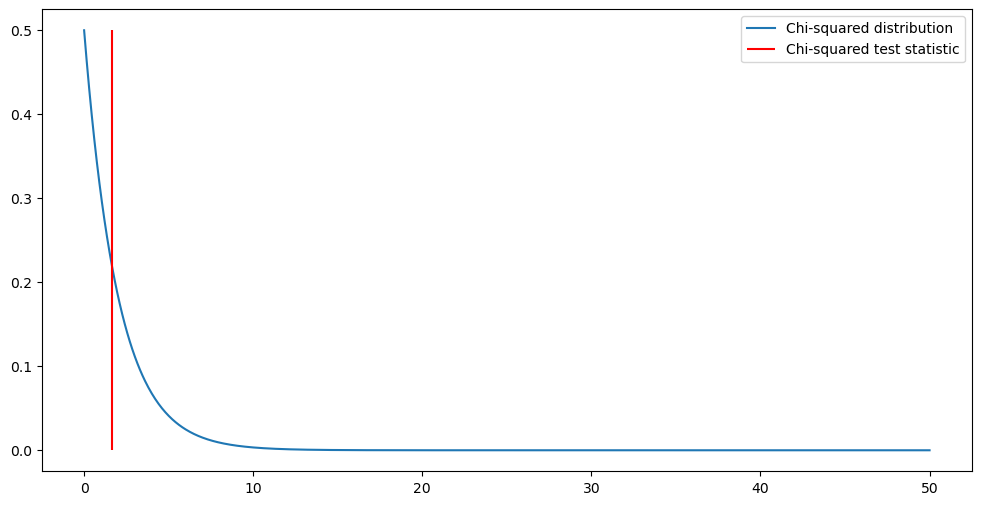

In [24]:
#@title Chi-squared distribution and test statistic
plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,c), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,c)), color="red", label="Chi-squared test statistic")
plt.legend()
plt.show()

## 5.&nbsp; Interpret the test result

Not too long ago, people used large tables to look up the critical values associated with a certain level of alpha, such as the one for the chi-squared test statistic below from [here](https://www.statology.org/how-to-read-chi-square-distribution-table/).

In the columns at the top, you need to select the level of alpha. In our case, alpha is 0.1.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation. In our case, the degrees of freedom is 2.

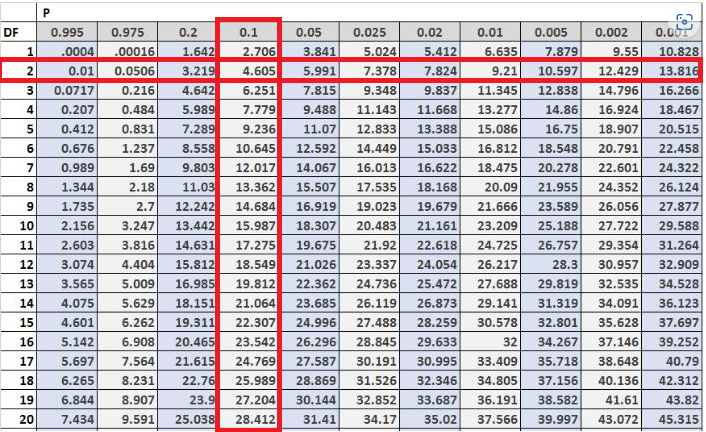

In [25]:
critical_value = 4.605

Let's remind ourselves of the chi-squared statistic

In [26]:
chi_squared

1.6659394708658917

Does this mean that we accept or reject the null hypothesis?

Let's visualise the chi-squared distribution with our test statistic and the critical value to make more sense of these numbers.

We include the critical value and identify the critical value.

Observe that the blue shaded area beneath the distribution curve encompasses all x-axis values that are more extreme than our critical value. This area represents alpha and corresponds to approximately 10% of the total area under the curve.

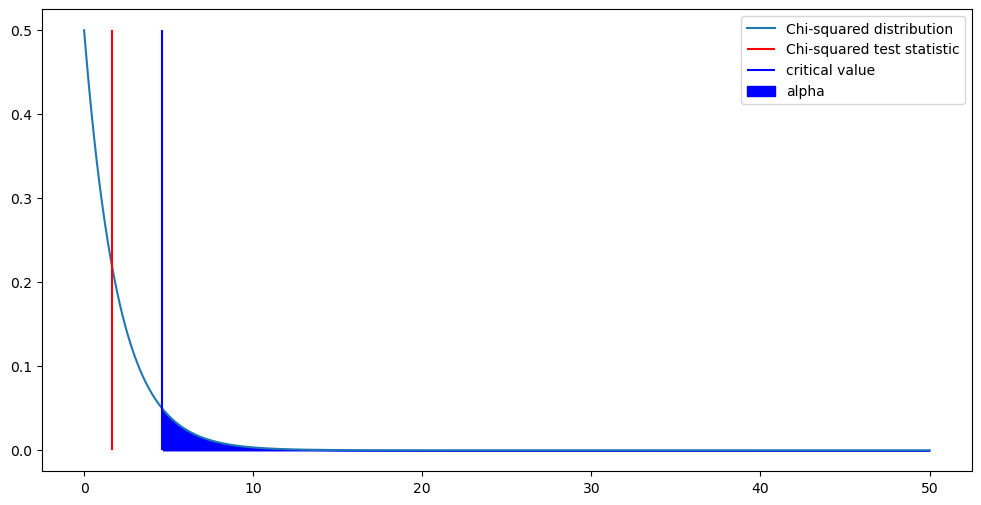

In [27]:
# @title Chi-squared distribution, test statistic and critical region
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,c), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,c)), color="red", label="Chi-squared test statistic")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,c)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than the critical value (= alpha).
plt.fill_between(xt, chi2.pdf(xt,c), where=(xt>critical_value), color= "b", label="alpha")
plt.legend()
plt.show()

The test statistic does not fall after the critical value as it is not more extreme than the critical value.

Therefore, we do not reject the Null Hypothesis.

Based on this analysis, we cannot conclude that any of the three different versions of the website performed significantly better or worse than the others. In fact, it is highly probable that they are perceived as nearly identical by the website visitors.

# II.&nbsp;The coder's approach

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.chi2_contingency.html) to perform chi-squared tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

> **Note**: Whether you compare alpha to the p-value or the test statistic to the critical value is a matter of personal taste. The result itself will always be the same.

You can see this in the chart below:

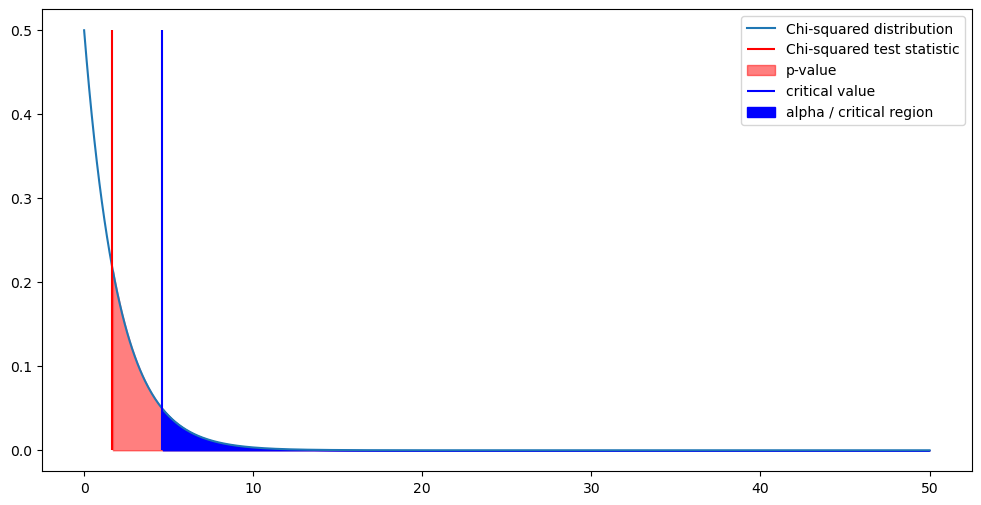

In [28]:
# @title Chi-squared distribution, test statistic, critical value and alpha
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,c), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,c)), color="red", label="Chi-squared test statistic")
# Shade the region in the tails that is more extreme than the test statistic (= p-value).
plt.fill_between(xt, chi2.pdf(xt,c), where=(xt>chi_squared), color= "r", alpha=0.5, label="p-value")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,c)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than 4.6 (= alpha).
plt.fill_between(xt, chi2.pdf(xt,c), where=(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

### Using SciPy

In [29]:
chisq, pvalue, df, expected = chi2_contingency(observed_results)

In [30]:
chisq

1.6659394708658917

In [31]:
pvalue

0.4347562562343731

In [32]:
df

2

In [33]:
expected

array([[ 11.33333333,  11.33333333,  11.33333333],
       [988.66666667, 988.66666667, 988.66666667]])

Check whether the chi-squared test statistic calculated manually and the one calculated using scipy are the same.

In [ ]:
chi_squared == chisq

True

SUCCESS!

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is larger than alpha.


Does this mean that we should reject the Null Hypothesis - or not?

Since the p-value is (much) larger than alpha, we do not reject the Null Hypothesis.

# III.&nbsp;Exercise

You have tested 4 versions A, B, C and D of the "SHOP NOW" button on Eniac's website.

After the experiment is complete with 1500 visits each, these are the results:

- Version A: 134 clicks, 1500 visits.
- Version B: 102 clicks, 1500 visits.
- Version C: 78 clicks, 1500 visits.
- Version D: 129 clicks, 1500 visits.

##Exercise solution

Follow these steps:
1. State the Null and the Alternative Hypotheses.
2. Define your alpha.
3. Collect data that is random and independent
4. Calculate the test result
5. Interpret the test result

### 1.&nbsp; State the Null and the Alternative Hypotheses.

\# What hypotheses can you make?
H_0: all clicks/visits ratios are equal
H_1: one clicks/visits ratio is significanty different

### 2.&nbsp;Define your alpha.

In [34]:
alpha= 0.1

### 3.&nbsp; Collect data that is random and independent

In [39]:
observed_clicks = [134, 102, 78, 129]

total_visits = 1500

# convert in clicks and no-clicks
observed_non_clicks = [total_visits - click for click in observed_clicks]

# DataFrame for observation
table_obs = pd.DataFrame([observed_clicks, observed_non_clicks],
                                  columns = ["A", "B", "C", "D"],
                                  index = ["Click", "No-click"])


In [40]:
table_obs

,A,B,C,D
Click,134,102,78,129
No-click,1366,1398,1422,1371


### 4.&nbsp; Calculate the test result.

In [42]:
chi2_stat, p_val, _, _ = chi2_contingency(table_obs)

print("Chi2:", chi2_stat)
print("p-value:", p_val)

Chi2: 19.720109791770167
p-value: 0.00019398896739266587


### 5.&nbsp; Interpret the test result.

In [43]:
if p_val > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.
